# heart failure project 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\Allewaa\Downloads\Compressed\heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

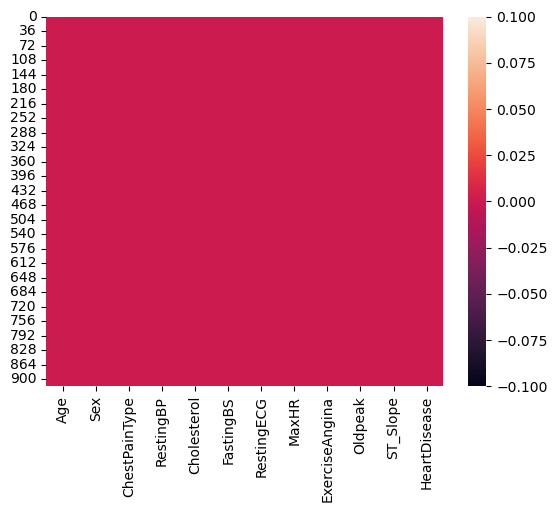

In [5]:
sns.heatmap(data.isnull())

In [6]:
data.duplicated().sum()

0

Text(0, 0.5, 'counts')

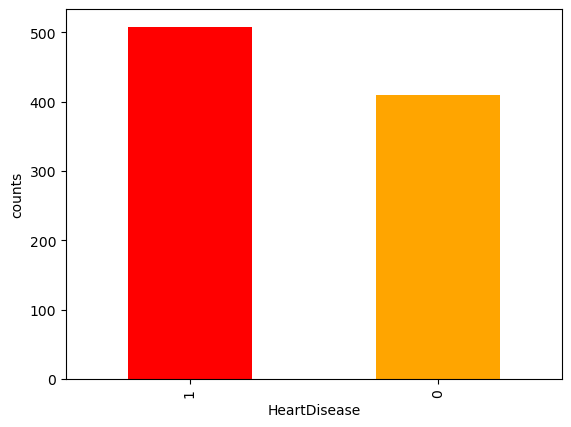

In [14]:
data['HeartDisease'].value_counts().plot(kind='bar',color=['red','orange'])
plt.xlabel('HeartDisease')
plt.ylabel('counts')

In [8]:
cor=data.corr()
cor

C:\Users\Allewaa\AppData\Local\Temp\ipykernel_7428\4173678507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

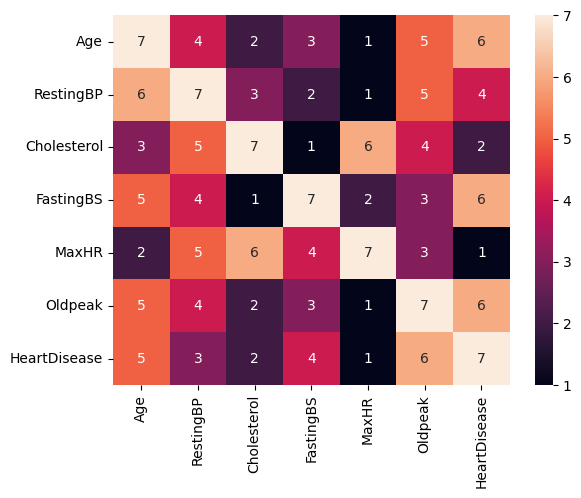

In [9]:
sns.heatmap(cor.rank(axis='columns'),annot=True)

C:\Users\Allewaa\AppData\Local\Temp\ipykernel_7428\2179694190.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['HeartDisease'], rug = True , hist = True ,kde = True)


<Axes: xlabel='HeartDisease', ylabel='Density'>

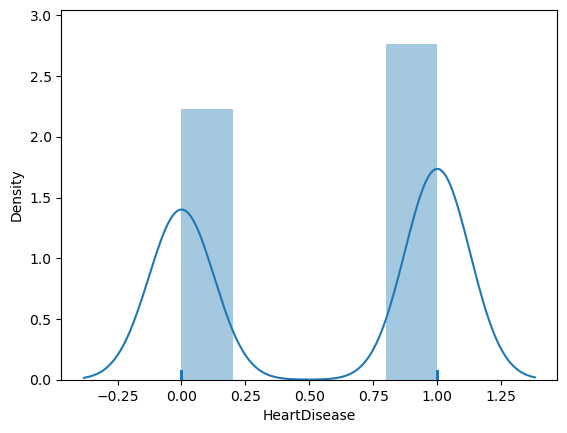

In [10]:
sns.distplot(data['HeartDisease'], rug = True , hist = True ,kde = True)

In [18]:
data.groupby('HeartDisease',as_index=False)['Age'].count().sort_values(by='Age',ascending=False)


,HeartDisease,Age
1,1,508
0,0,410


In [29]:
pivot_table=data.pivot_table(index='Age',columns='Sex',values='Cholesterol')
pivot_table

Sex,F,M
Age,,
28,NaN,132.000000
29,NaN,236.666667
30,237.000000,NaN
31,219.000000,270.000000
32,198.000000,252.000000
33,246.000000,298.000000
34,185.500000,154.400000
35,170.000000,207.750000
36,NaN,190.333333


In [30]:
pivot_table.dropna()

Sex,F,M
Age,,
31,219.000000,270.000000
32,198.000000,252.000000
33,246.000000,298.000000
34,185.500000,154.400000
35,170.000000,207.750000
37,214.750000,244.571429
38,91.666667,159.153846
39,200.333333,248.916667
40,392.000000,215.833333


<Axes: xlabel='Age'>

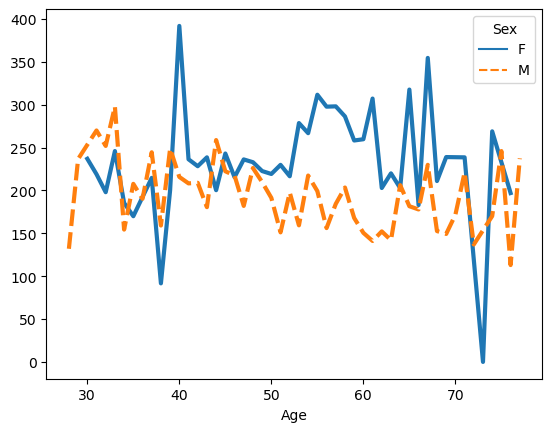

In [33]:
sns.lineplot(data=pivot_table ,linewidth=3 )